# **Tokenization** Or **Text Vectorization**

If you’ve been in the data field for quite some time, you’ve probably know that any NLP or Large Language models requires numerical input.  

Therefore, Text Vectorization or Token Embedding is required to converts textual data into numerical format, enabling the model to process and analyze it effectively.

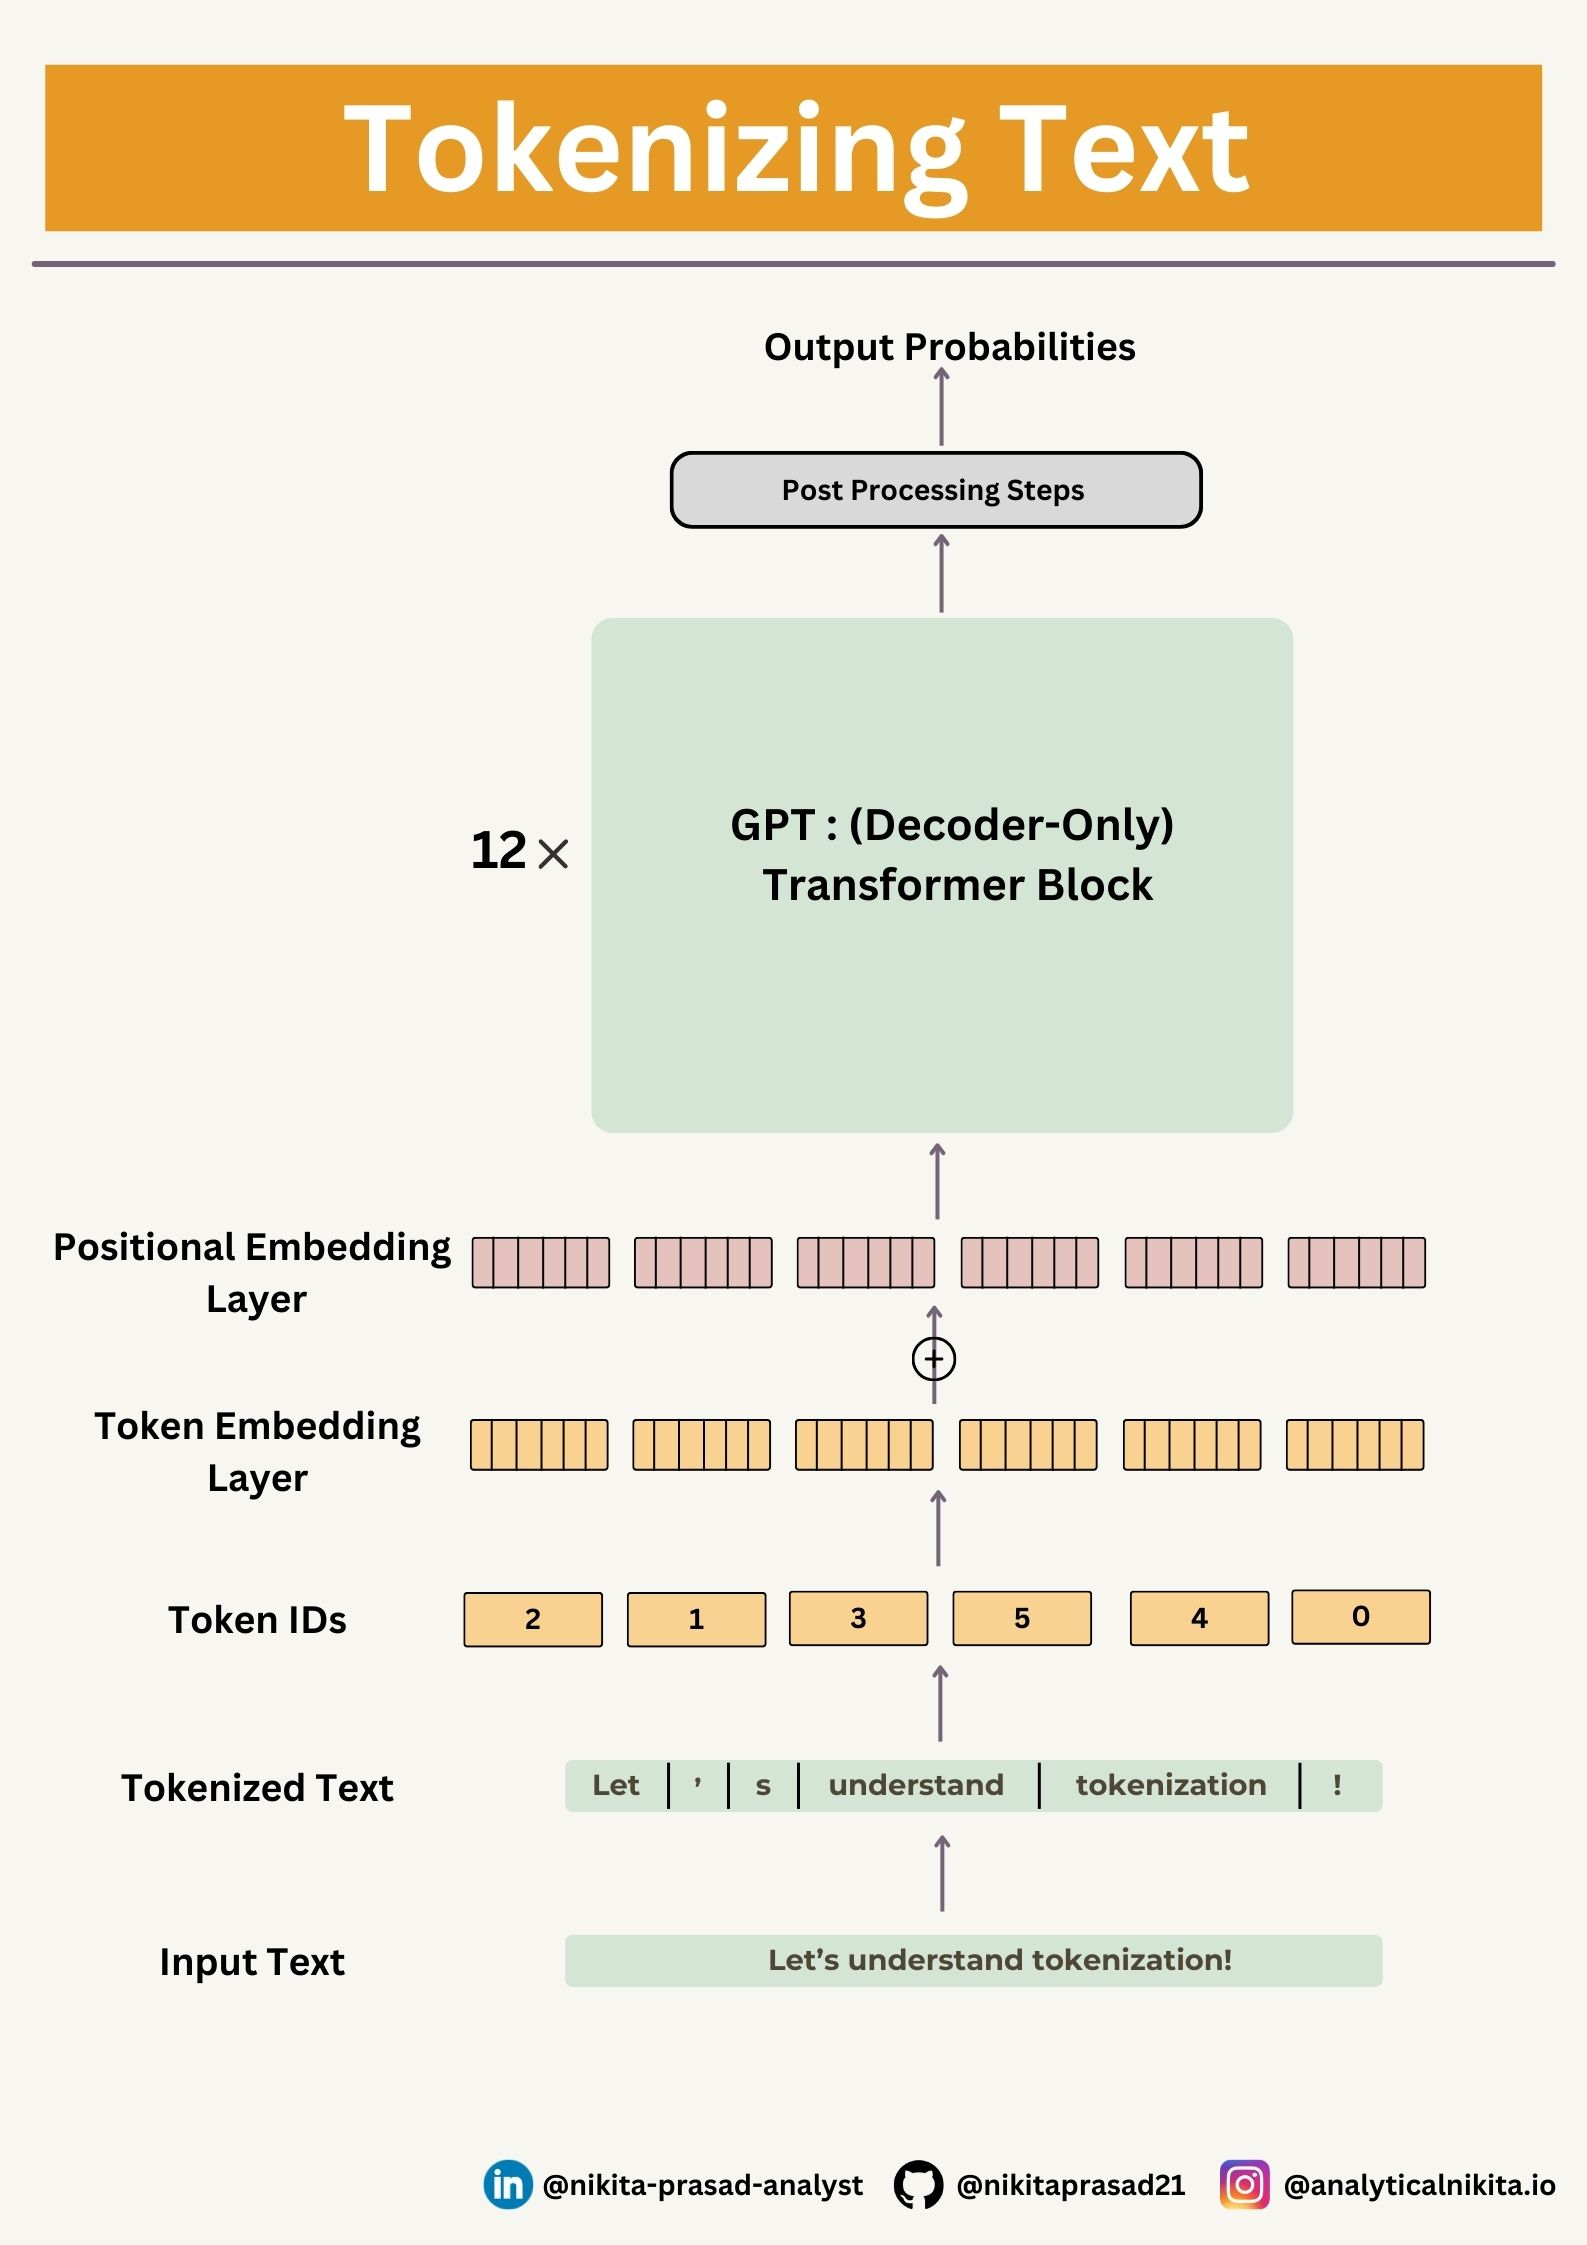

Packages that are being used in this notebook:

In [ ]:
import os
import urllib.request

### Importing Text Data

In this implementation I am using **The Awakening** by *Kate Chopin*, a public domain short story, written in 1899, so there is no copyright on that.


<div class="alert alert-block alert-warning">

**Note**: It is recommended to be aware and respectful of existing copyrights and people privacy, while preparing datasets for training LLMs.

</div>

In [ ]:
# URL of the raw content of the markdown file
if not os.path.exists("the-awkening.txt"):
    url = ("https://raw.githubusercontent.com/mlschmitt/classic-books-markdown/main/Kate%20Chopin/The%20Awakening.md")
    file_path = "the-awkening.txt"
    urllib.request.urlretrieve(url, file_path)

In [ ]:
with open("the-awkening.txt", "r", encoding="utf-8") as f:
    input_text = f.read()

print("Total number of character:", len(input_text))
print(input_text[79:237])

Total number of character: 280423
A green and yellow parrot, which hung in a cage outside the door, kept repeating over and over:

"Allez vous-en! Allez vous-en! Sapristi! That's all right!"




<div class="alert alert-block alert-success">

**Goal**: Tokenize these 280423-character short story into individual words and special characters, that can be converted into embeddings for LLM training.  

</div>

<div class="alert alert-block alert-warning">

**Note**: It's common to process millions of articles and hundreds of thousands of books -- many gigabytes of text -- when working with LLMs. However, for understanding purposes, it's sufficient to work with smaller text samples like a single book to illustrate the main ideas behind the text processing steps and to make it possible to run it in reasonable time on consumer hardware.

</div>



## How can we best split this text to obtain a list of tokens?

For this, from first principle approach, we will do is use Python's regular expression library `re` for illustration purposes.


<div class="alert alert-block alert-warning">

**Note:** You don't have to learn or memorize any regular expression syntax since we will transition to a pre-built tokenizer later.


</div>

In [ ]:
import re


## Word-based Tokenization

It is the most straightforward tokenization technique, it splits the input text into words based upon the whitespace between them and find a numerical representation for each of them.

For instance, as shown in the image:

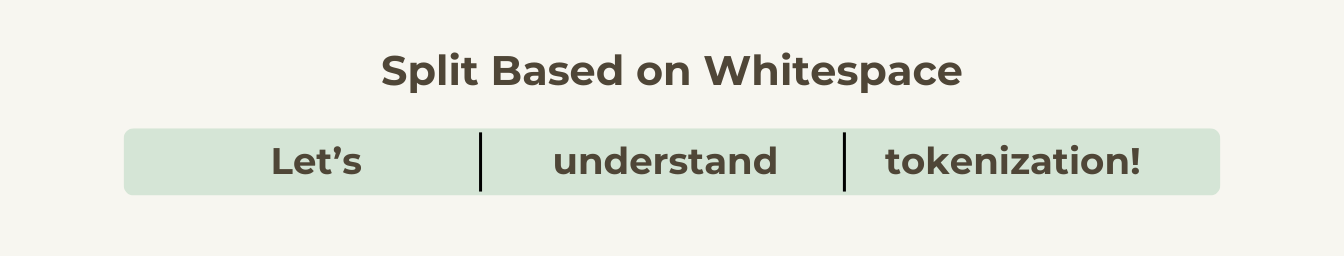



Using first sentence of our dataset, we can use the **re.split** command with the following syntax to split a text on whitespace characters:

In [ ]:
sampled_input_text = input_text[79:237]
result1 = re.split(r'(\s)', sampled_input_text)

print(result1)

['A', ' ', 'green', ' ', 'and', ' ', 'yellow', ' ', 'parrot,', ' ', 'which', ' ', 'hung', ' ', 'in', ' ', 'a', ' ', 'cage', ' ', 'outside', ' ', 'the', ' ', 'door,', ' ', 'kept', ' ', 'repeating', ' ', 'over', ' ', 'and', ' ', 'over:', '\n', '', '\n', '"Allez', ' ', 'vous-en!', ' ', 'Allez', ' ', 'vous-en!', ' ', 'Sapristi!', ' ', "That's", ' ', 'all', ' ', 'right!"', '\n', '', '\n', '']



The result is a list of individual words, whitespaces, and punctuation characters.




Let's modify the regular expression splits on whitespaces (\s) and commas, and periods
([,.]):

In [ ]:
result2 = re.split(r'([,.]|\s)', sampled_input_text)

print(result2)

['A', ' ', 'green', ' ', 'and', ' ', 'yellow', ' ', 'parrot', ',', '', ' ', 'which', ' ', 'hung', ' ', 'in', ' ', 'a', ' ', 'cage', ' ', 'outside', ' ', 'the', ' ', 'door', ',', '', ' ', 'kept', ' ', 'repeating', ' ', 'over', ' ', 'and', ' ', 'over:', '\n', '', '\n', '"Allez', ' ', 'vous-en!', ' ', 'Allez', ' ', 'vous-en!', ' ', 'Sapristi!', ' ', "That's", ' ', 'all', ' ', 'right!"', '\n', '', '\n', '']



We can see that the words and punctuation characters are now separate list entries just as we wanted.




But, there's a small remaining issue is that the list still includes whitespace characters. Optionally, we can remove these redundant characters safely as follows:

In [ ]:
result3 = []

for item in result2:
  if item != " " and item != "":
    result3.append(item)

print(result3)

['A', 'green', 'and', 'yellow', 'parrot', ',', 'which', 'hung', 'in', 'a', 'cage', 'outside', 'the', 'door', ',', 'kept', 'repeating', 'over', 'and', 'over:', '\n', '\n', '"Allez', 'vous-en!', 'Allez', 'vous-en!', 'Sapristi!', "That's", 'all', 'right!"', '\n', '\n']


The tokenization scheme we devised above works well on the our sampled input text.

<div class="alert alert-block alert-success">

**Is it necessary to remove the whitespace?**

When developing a simple tokenizer, whether we should encode whitespaces as separate characters or just remove them depends on our application and its requirements.

Removing whitespace reduces the memory and computing requirements.

However, keeping whitespace can be useful if we train models that are sensitive to the exact structure of the text (for example, Python code, which is sensitive to indentation and spacing).

Here, we remove whitespace for simplicity and brevity of the tokenized outputs.

</div>





Now, let's
modify it a bit further so that it can also handle other types of punctuation, such as
question marks, quotation marks, and the double-dashes, along with additional special characters:

## Creating Tokens

In [ ]:
preprocessed_tokens = re.split(r'([,.:;?_!"()\']|--|\s)', input_text)
preprocessed_tokens = [item.strip() for item in preprocessed_tokens if item.strip()]
print(preprocessed_tokens[:30])

['#', 'Title', ':', 'The', 'Awakening', '##', 'Author', ':', 'Kate', 'Chopin', '##', 'Year', ':', '1899', '--', '--', '--', '-', '##', 'I', 'A', 'green', 'and', 'yellow', 'parrot', ',', 'which', 'hung', 'in', 'a']


In [ ]:
print(len(preprocessed_tokens))

59897


## Creating Token IDs From Tokens

Next, we need to convert the preprocessed tokens into integer token IDs, later these integers can be embedded into LLM as input.

Below image illustrates the tokenization of a short sample text using a small vocabulary:



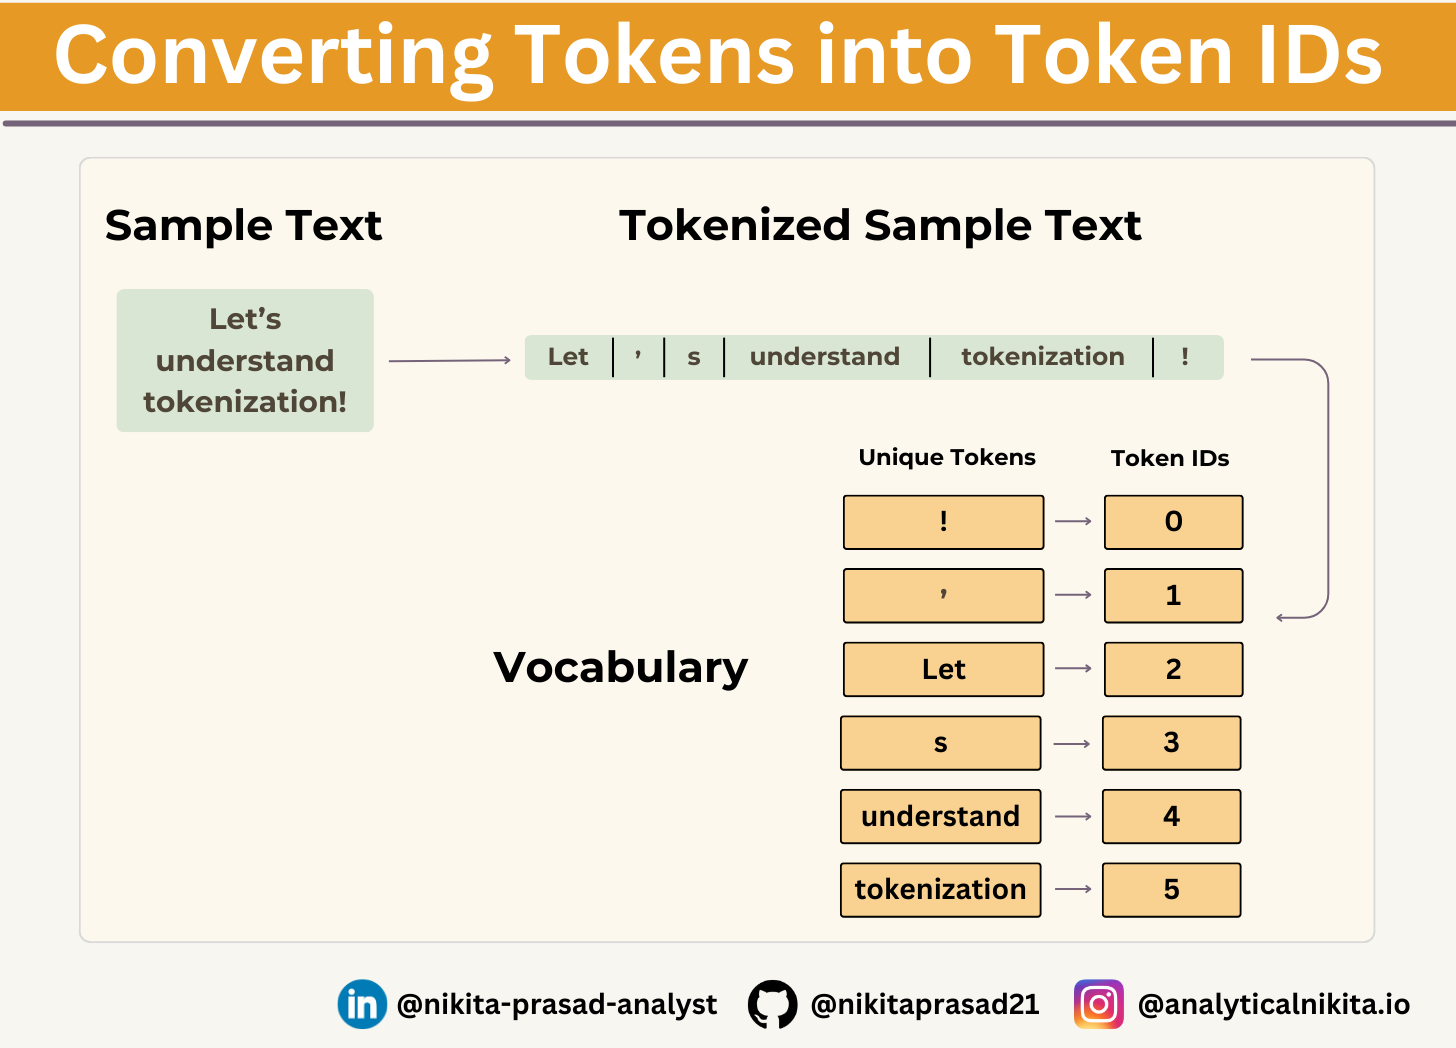

For this first let's sorts the unique tokens from the preprocessed_tokens list and calculates the size of the resulting vocabulary.

In [ ]:
unique_tokens = sorted(set(preprocessed_tokens))
vocab_size = len(unique_tokens)

print(vocab_size)

6155




After determining that the vocabulary size is 6155 via the above code, we create the vocabulary and print its first 50 entries:



In [ ]:
vocab = {token:index for index, token in enumerate(unique_tokens)}

for i, item in enumerate(vocab.items()):
  if i < 50:
    print(item)

('!', 0)
('"', 1)
('#', 2)
('##', 3)
("'", 4)
('(', 5)
(')', 6)
(',', 7)
('-', 8)
('--', 9)
('.', 10)
('1899', 11)
(':', 12)
(';', 13)
('?', 14)
('A', 15)
('About', 16)
('Above', 17)
('Acadian', 18)
('Add', 19)
('Adele', 20)
('Adieu', 21)
('After', 22)
('Again', 23)
('Ah', 24)
('Alcee', 25)
('Aline', 26)
('All', 27)
('Allez', 28)
('Almost', 29)
('Alphonse', 30)
('Always', 31)
('Am', 32)
('America', 33)
('American', 34)
('An', 35)
('And', 36)
('Angostura', 37)
('Another', 38)
('Antoine', 39)
('Any', 40)
('Anything', 41)
('Are', 42)
('Aren', 43)
('Arobin', 44)
('Arobin-you', 45)
('As', 46)
('Ask', 47)
('At', 48)
('Au', 49)



As we can see, based on the output above, the dictionary contains individual tokens
associated with unique integer labels.




Later, when we want to convert the outputs of an LLM from numbers back into
text, we also need a way to turn token IDs into text.

For this, we can create an inverse
version of the vocabulary that maps token IDs back to corresponding text tokens.




## Let's implement a Simple Tokenizer Class in Python

The class will have an encode method that splits
text into tokens and carries out the string-to-integer mapping to produce token IDs via the
vocabulary.




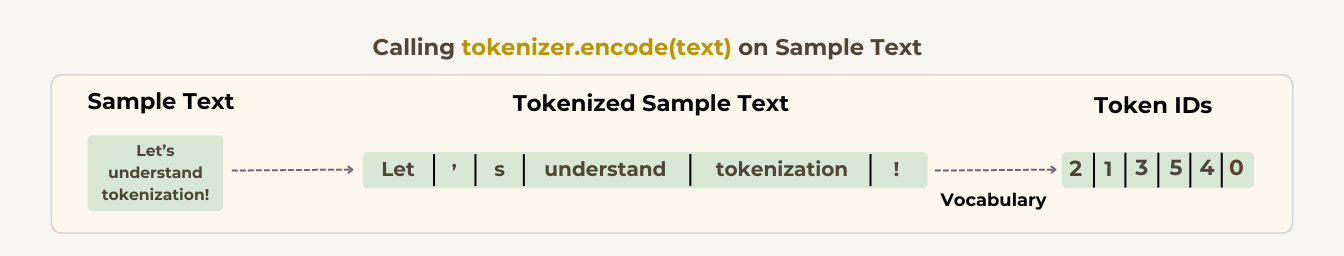




In addition, we implement a decode method that carries out the reverse
integer-to-string mapping to convert the token IDs back into text.


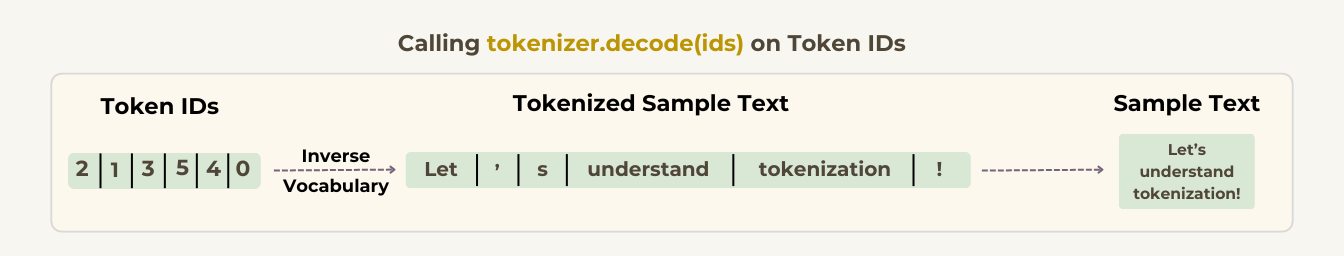

<div class="alert alert-block alert-info">

**Following steps are implemented in the below code snippet:**
    
**Step 1**: Store the vocabulary as a class attribute so that it is accessed by the encode and decode methods
    
**Step 2**: Create an inverse vocabulary that maps token IDs back to the original text tokens

**Step 3**: Process input text into token IDs, also called Encoding

**Step 4**: Convert token IDs back into text, also called Decoding

**Step 5**: Replace spaces before the specified punctuation to get better results

</div>



In [ ]:
class SimpleTokenzier:
  """
    A simple tokenizer class that converts text into numerical tokens (ids)
    based on a pre-defined vocabulary and can decode tokens back into text.

    Attributes:
        str_to_int (dict): A dictionary mapping tokens (strings) to integers.
        int_to_str (dict): A dictionary mapping integers back to their token (string).
  """
  def __init__(self, vocab):
    self.str_to_int = vocab
    # Reverse mapping for decoding
    self.int_to_str = {index:token for token, index in vocab.items()}

  def encode(self, text):
    tokens = re.split(r'([,.:;\'?_!()"]|--|\s)', text)
    tokens = [token.strip() for token in tokens if token.strip()]
    ids = [self.str_to_int[token] for token in tokens]
    return ids

  def decode(self, ids):
    text = " ".join([self.int_to_str[ind] for ind in ids])
    # Remove unnecessary spaces before punctuation for natural text.
    text = re.sub(r'\s+([,.:;\'?!()"])', r"\1", text)
    return text



Let's instantiate a tokenizer object of `SimpleTokenzier` class and tokenize our sampled input text, using `encode` method:



In [ ]:
tokenizer = SimpleTokenzier(vocab)
ids = tokenizer.encode(sampled_input_text)
print(ids)

[15, 2744, 726, 6135, 4018, 7, 6005, 2957, 3042, 546, 1217, 3946, 5494, 1982, 7, 3251, 4555, 3949, 726, 3949, 12, 1, 28, 5905, 0, 28, 5905, 0, 382, 0, 431, 4, 4708, 691, 4645, 0, 1]



Next, let's see if we can turn these token IDs back into text using the `decode` method:


In [ ]:
tokenizer.decode(ids)

'A green and yellow parrot, which hung in a cage outside the door, kept repeating over and over:" Allez vous-en! Allez vous-en! Sapristi! That\' s all right!"'


    
Based on the output above, we can see that the decode method successfully converted the
token IDs back into the original text.







So far, so good. We implemented a tokenizer capable of tokenizing and de-tokenizing
text based on a snippet from the training set.

Let's now apply it to a new text sample that
is not contained in the training set:


In [ ]:
text = "Hello, you're learning data science with analytical-nikita.io"
print(tokenizer.encode(text))

KeyError: 'Hello'

<div class="alert alert-block alert-info">
    
The problem is that the word "**Hello**" was not used in the The Awakening short story.

Hence, it's not present in the vocabulary.

This highlights the need to consider large and diverse
training sets to extend the vocabulary when working on LLMs.

</div>

## Adding Special Context Tokens

We can modify the tokenizer to use an `<|unk|>` token, if it encounters a word that is not part of the vocabulary.

Furthermore, we add a special token `<|endoftext|>` between unrelated texts. For example, when training LLMs like GPT-2 they also used `<|endoftext|>` on multiple independent documents and books.


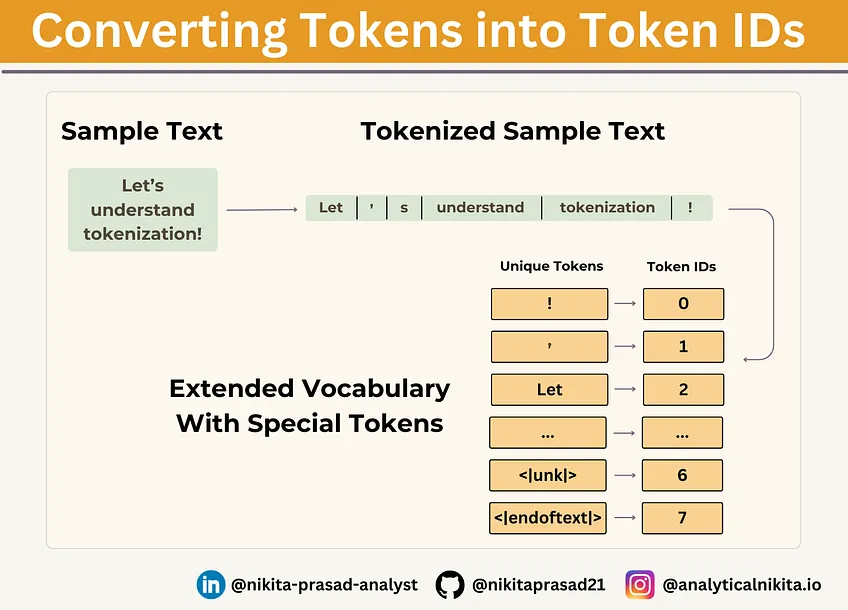



Let's now modify the vocabulary to include these two special tokens, i.e, `<|unk|>` and
`<|endoftext|>`, by adding these to the previously created list of all unique words
:


In [ ]:
unique_tokens = sorted(list(set(preprocessed_tokens)))
unique_tokens.extend(["<|endoftext|>", "<unk>"])
vocab = {token:index for index, token in enumerate(unique_tokens)}

In [ ]:
len(vocab.items())

6157


    
Based on the output of the print statement above, the new vocabulary size is 6157 (the
vocabulary size in the previous section was 6153).



As an additional quick check, let's print the last 5 entries of the updated vocabulary:


In [ ]:
for i, item in enumerate(list(vocab.items())[-5:]):
  print(item)

('yourself', 6152)
('youth', 6153)
('youthful', 6154)
('<|endoftext|>', 6155)
('<unk>', 6156)


Cool, our two special tokens are added to the vocabulary.



## Let's build a Simple Text Tokenizer that handles Unknown Words.

**Step 1**: Replace unknown words by `<|unk|>` tokens

    


In [ ]:
class SimpleTokenzierToHandleUnknowns:
  """
    A tokenizer class that converts text into numerical tokens (ids) based on
    a predefined vocabulary. It handles unknown tokens by replacing them with
    a special `<unk>` token. The tokenizer can also decode ids back to text.

    Attributes:
        str_to_int (dict): A dictionary mapping tokens (strings) to integers.
        int_to_str (dict): A dictionary mapping integers back to their token (string).
  """
  def __init__(self, vocab):
    self.str_to_int = vocab
    self.int_to_str = {index:token for token, index in vocab.items()}

  def encode(self, text):
    tokens = re.split(r'([,.:;\'?_!()"]|--|\s)', text)
    tokens = [token.strip() for token in tokens if token.strip()]
    tokens = [token if token in self.str_to_int
              else "<unk>" for token in tokens] # Replace unknown tokens with `<unk>`
    ids = [self.str_to_int[token] for token in tokens]
    return ids

  def decode(self, ids):
    text = " ".join([self.int_to_str[ind] for ind in ids])
    # Replacing spaces before the specified punctuations for better result
    text = re.sub(r'\s+([,.:;\'?!()"])', r"\1", text)
    return text

Let’s instantiate a tokenizer object for `SimpleTokenzierToHandleUnknowns` class and repeat all the above mentioned steps.
 :

In [ ]:
tokenzier = SimpleTokenzierToHandleUnknowns(vocab)

text1 = "Hello, you're learning data science with analytical-nikita.io"
text2 = "In the sunlit terraces of the palace."

text = " <|endoftext|> ".join((text1, text2))

In [ ]:
tokenzier.encode(text)

[6156,
 7,
 6144,
 4,
 4426,
 6156,
 6156,
 6156,
 6067,
 6156,
 10,
 6156,
 6155,
 231,
 5494,
 6156,
 6156,
 3892,
 5494,
 6156,
 10]

In [ ]:
tokenzier.decode(tokenzier.encode(text))

"<unk>, you' re <unk> <unk> <unk> with <unk>. <unk> <|endoftext|> In the <unk> <unk> of the <unk>."


    
Based on comparing the de-tokenized text above with the original input text, we know that
the training dataset, Kate Chopin's short story The Awakening, did not contain the words like
"Hello", "learning", "data", "science", "analytical-nikita.io", "palace", etc.




<div class="alert alert-block alert-info">


Even though, we get an output but it’s generally a bad sign if you see that the tokenizer is producing a lot of <unk> tokens, as it wasn’t able to retrieve a sensible representation of a word and you’re losing information along the way.

This is the major drawback of this technique, including :

* **Large Vocabulary Issue**: A word-based tokenizer needs a unique ID for every word, resulting in a very large vocabulary (e.g., 500,000+ words in English).

  * **Unique IDs for Words**: Each word, including variations like "toy" and "toys", gets a unique ID, with no initial understanding of their similarity.

  * **Morphological Challenges**: Words like "eat", “eating” and "eaten" are treated as unrelated, limiting the model's ability to generalize word relationships.

* **Unknown Token ([UNK] or <unk>)**: Represents out-of-vocabulary words; frequent use indicates poor tokenization and information loss.

Our goal is to build an efficient vocabulary, that the tokenizer tokenizes as few words as possible into the unknown token.

One way to reduce the amount of unknown tokens is to get the best of both worlds.

GPT-2 model uses a **Byte-Pair Encoding Tokenizer**, which breaks down words into sub-word tokens, which we will discuss next!

</div>



<div class="alert alert-block alert-warning">

**Note:** Depending on the LLM, some researchers also consider additional special tokens such
as the following:

* **[BOS] (beginning of sequence)**: This token signifies about the start of a text to the LLM wh.

* **[EOS] (end of sequence)**: Similar to <|endoftext|>, this token is positioned at the end of a text, and is especially useful when concatenating multiple unrelated texts.


* **[PAD] (padding)**: While training LLMs with batch sizes larger than one, the batch might contain texts of varying lengths, to ensure all texts have the same length, the shorter texts are extended or "padded" using the [PAD] token, up to the length of the longest text in the batch.

</div>




> Stay tuned for Byte Pair Encoding Repo and Don't forget to **Star** this Github Repository for more such contents and consider sharing with others.


